In [42]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [53]:
data = np.loadtxt('C:\\Users\\dudwh\\signlanguage1\\dataset\\handtrain.csv', delimiter=',')

angle = data[:,:-1].astype(np.float32)
label = data[:, -1].astype(np.float32)

print(angle.shape, label.shape)

(3138, 15) (3138,)


In [54]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_label = ohe.fit_transform(label.reshape(-1, 1)).toarray()
encoded_label = encoded_label.astype(np.float32)

print(encoded_label.shape)

(3138, 26)


In [55]:
ohe.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32)]

In [56]:
input = Input(shape=(15,))

x = Dense(32, activation='relu')(input)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)

x = Dense(32, activation='relu')(x)

output = Dense(26, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_48 (Dense)            (None, 32)                512       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_12 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_49 (Dense)            (None, 64)                2112      
                                                                 
 dense_50 (Dense)            (None, 128)               8320      
                                                           

In [57]:
history=model.fit(angle, encoded_label, epochs=450)
history.history.keys()

Epoch 1/450
99/99 [==============================] - 1s 3ms/step - loss: 2.7318 - acc: 0.1992
Epoch 2/450
99/99 [==============================] - 0s 3ms/step - loss: 1.7716 - acc: 0.4073
Epoch 3/450
99/99 [==============================] - 0s 3ms/step - loss: 1.4684 - acc: 0.4678
Epoch 4/450
99/99 [==============================] - 0s 3ms/step - loss: 1.3267 - acc: 0.5226
Epoch 5/450
99/99 [==============================] - 0s 3ms/step - loss: 1.2610 - acc: 0.5411
Epoch 6/450
99/99 [==============================] - 0s 3ms/step - loss: 1.1897 - acc: 0.5723
Epoch 7/450
99/99 [==============================] - 0s 3ms/step - loss: 1.1557 - acc: 0.5816
Epoch 8/450
99/99 [==============================] - 0s 3ms/step - loss: 1.1297 - acc: 0.5985
Epoch 9/450
99/99 [==============================] - 0s 3ms/step - loss: 1.0889 - acc: 0.6039
Epoch 10/450
99/99 [==============================] - 0s 3ms/step - loss: 1.0417 - acc: 0.6236
Epoch 11/450
99/99 [==============================] - 0s 3m

99/99 [==============================] - 0s 3ms/step - loss: 0.6099 - acc: 0.7849
Epoch 88/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5951 - acc: 0.7938
Epoch 89/450
99/99 [==============================] - 0s 3ms/step - loss: 0.6043 - acc: 0.7750
Epoch 90/450
99/99 [==============================] - 0s 3ms/step - loss: 0.6049 - acc: 0.7843
Epoch 91/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5983 - acc: 0.7929
Epoch 92/450
99/99 [==============================] - 0s 3ms/step - loss: 0.6016 - acc: 0.7839
Epoch 93/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5977 - acc: 0.7852
Epoch 94/450
99/99 [==============================] - 0s 3ms/step - loss: 0.6036 - acc: 0.7945
Epoch 95/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5879 - acc: 0.7916
Epoch 96/450
99/99 [==============================] - 0s 3ms/step - loss: 0.6146 - acc: 0.7862
Epoch 97/450
99/99 [==============================] - 0s 3ms/st

99/99 [==============================] - 0s 3ms/step - loss: 0.4763 - acc: 0.8295
Epoch 173/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4778 - acc: 0.8362
Epoch 174/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4855 - acc: 0.8337
Epoch 175/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5086 - acc: 0.8292
Epoch 176/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4688 - acc: 0.8381
Epoch 177/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4781 - acc: 0.8426
Epoch 178/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5006 - acc: 0.8231
Epoch 179/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4841 - acc: 0.8301
Epoch 180/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5075 - acc: 0.8266
Epoch 181/450
99/99 [==============================] - 0s 3ms/step - loss: 0.5075 - acc: 0.8250
Epoch 182/450
99/99 [==============================] -

99/99 [==============================] - 0s 3ms/step - loss: 0.4577 - acc: 0.8423
Epoch 258/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4771 - acc: 0.8480
Epoch 259/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4530 - acc: 0.8397
Epoch 260/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4621 - acc: 0.8413
Epoch 261/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4560 - acc: 0.8445
Epoch 262/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4354 - acc: 0.8474
Epoch 263/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4586 - acc: 0.8502
Epoch 264/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4625 - acc: 0.8493
Epoch 265/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4678 - acc: 0.8445
Epoch 266/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4379 - acc: 0.8585
Epoch 267/450
99/99 [==============================] -

99/99 [==============================] - 0s 3ms/step - loss: 0.3987 - acc: 0.8604
Epoch 343/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4152 - acc: 0.8550
Epoch 344/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4127 - acc: 0.8630
Epoch 345/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3976 - acc: 0.8601
Epoch 346/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4024 - acc: 0.8671
Epoch 347/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4040 - acc: 0.8614
Epoch 348/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3886 - acc: 0.8674
Epoch 349/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3962 - acc: 0.8703
Epoch 350/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4200 - acc: 0.8646
Epoch 351/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4283 - acc: 0.8598
Epoch 352/450
99/99 [==============================] -

99/99 [==============================] - 0s 3ms/step - loss: 0.4109 - acc: 0.8693
Epoch 428/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3976 - acc: 0.8601
Epoch 429/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3666 - acc: 0.8783
Epoch 430/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4082 - acc: 0.8623
Epoch 431/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3833 - acc: 0.8684
Epoch 432/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3710 - acc: 0.8728
Epoch 433/450
99/99 [==============================] - 0s 3ms/step - loss: 0.4033 - acc: 0.8709
Epoch 434/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3544 - acc: 0.8818
Epoch 435/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3764 - acc: 0.8709
Epoch 436/450
99/99 [==============================] - 0s 3ms/step - loss: 0.3885 - acc: 0.8735
Epoch 437/450
99/99 [==============================] -

dict_keys(['loss', 'acc'])

In [58]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

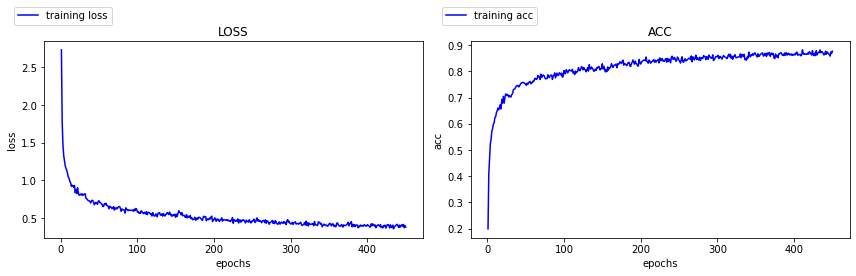

In [59]:
plot_history(history)

In [60]:
# print(history.history['loss'])
print(history.history['acc'][444])


0.8671128153800964


In [32]:
model.save('handtrain(400(87.9)).h5')